# RASSVFS Match
This notebook is a tutorial on how I utilized the Virgo Filiment Survey (VFS) to match and sort with the RASSCALS database.
I'll cover:
* The handling of .fits files used in the VFS 
* Making plots in pyplot
* Galactic coordinate systems
  * and how to match and convert between them
* Calculating angular distances

I use Astropy, matplotlib, and numpy, and so resources on those are helpful as well for understanding.
* Astropy user guide: https://docs.astropy.org/en/stable/index_user_docs.html
* Matplotlib.pyplot user guide: https://matplotlib.org/stable/users/index.html
* Numpy documentation: https://numpy.org/doc/stable/index.html
* Accessible colors for plots: https://colorbrewer2.org/
***

### RASSCALS Section
Introducing RASSCALS data and manipulating it.
> The ROSAT All-Sky Survey Center for Astrophysics Loose Systems (RASSCALS), is a X-ray and optical survey of low-mass galaxy groups. There are 260 galactic groups at a median cosmological recession velocity of cz = 7250 km/s.
> Data is availible at https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJ/534/114.

We would like to use this to gather x-ray data about galaxies, the intergalactic medium, and groups within the Virgo Filament survey (6780 galaxies).

Importing the necessary packages

In [2]:
# dependancies
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import ascii
from astropy.coordinates import Angle
from astropy import units as u

To view and manage the galactic group data from RASSCALS, we will import it as a DataTable object, using astropy's ascii function.

In [3]:
#reading in RASSCALS data
#outputted from site into .csv, opened in Excel and then converted to tab-delimited .txt for readable columns
tbl=ascii.read("C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots/RASSCALS-VFS MATCH/RASSCALS.txt")

In [4]:
tbl #view table
# format for accessing columns of data : tablename['Columnname']

RASSCALS,RAJ2000,DEJ2000,N,N17,cz,e_cz,logsigmap,logLX,e_logsigmap,e_logLX
str7,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64
SS2b003,2.2324999999999995,-37.47083333,5,35,8357,60,2.14,42.1,0.2,--
SRGb061,2.93625,28.359722222222217,10,57,7855,163,2.71,41.9,0.06,--
SS2b004,3.6966666666666663,-7.237777778,5,11,5290,65,2.19,41.7,0.14,--
SS2b005,3.8812499999999996,-24.12722222,5,24,7390,35,1.86,42.0,0.15,--
SRGb062,4.6049999999999995,30.070277777777772,13,49,6811,122,2.64,42.66,0.1,0.07
SRGb063,5.409999999999999,22.40555555555555,10,25,5665,87,2.46,42.56,0.11,0.09
SS2b009,6.073333333333332,-14.24361111,5,20,6919,153,2.53,41.9,0.23,--
SRGb067,7.200416666666666,2.905277777777777,8,7,4141,62,2.28,41.5,0.09,--
SRGb069,7.603333333333333,30.97583333333333,9,27,6232,40,2.08,41.8,0.08,--


The RASSCALS data has 260 rows and 11 columns. Each row is a galaxy group in the survey. <br>
The columns are: < RASSCALS | RAJ2000 | DEJ2000 | N | N17 | cz | e_cz | logsigmap | logLX | e_logsigmap | e_logLX > <br>
RASSCALS: ID given to galaxy <br>
RAJ2000: Right Ascension [degrees]<br>
DEJ2000: Declination [degrees] <br>
N: Number of memebers <br>
N17: Number of members at absolute magnitude <br>
cz: Recessional velocity [km/s] <br>
e_cz: Error in recessional velocity <br>
logsigmap: Velocity dispersion of the dark matter halo of the galaxy group <br>
logLX: X-ray luminosity [ log(1e-07W) ] <br>
e_logsigmap: error in logsigmap <br>
e_logLX: error in X-ray luminosity <br>

We can get a basic view of the groups in RASSCALS by plotting each of the RA/DEC coordinates. <br>
You can access each column as an array in the format of: tablename['Columntitle']

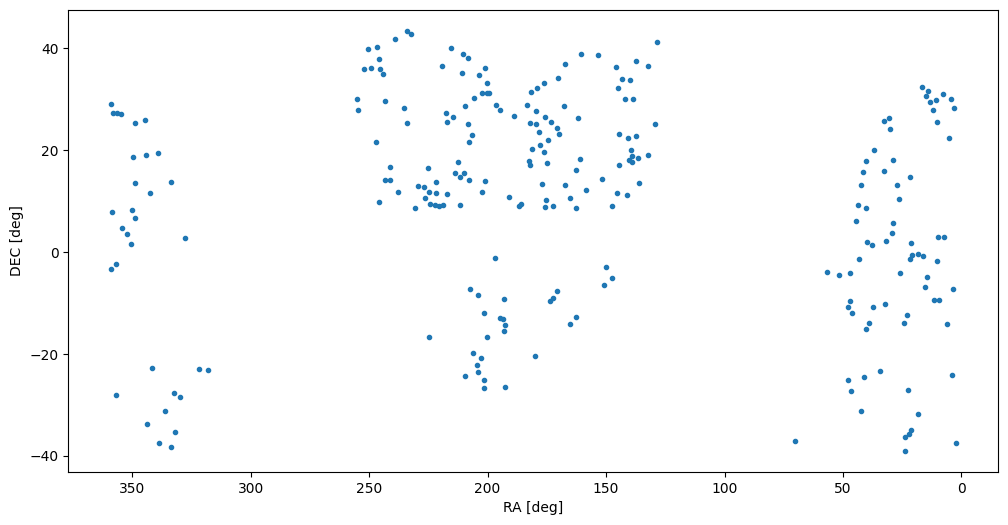

In [5]:
# plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plots
# format for accessing columns of data : tablename['Columnname']
plt.figure(figsize=(12,6))
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],marker='.')
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
ax = plt.gca()
ax.invert_xaxis()
plt.show()

This is all of the groups in the survey plotted on the sky by degrees.

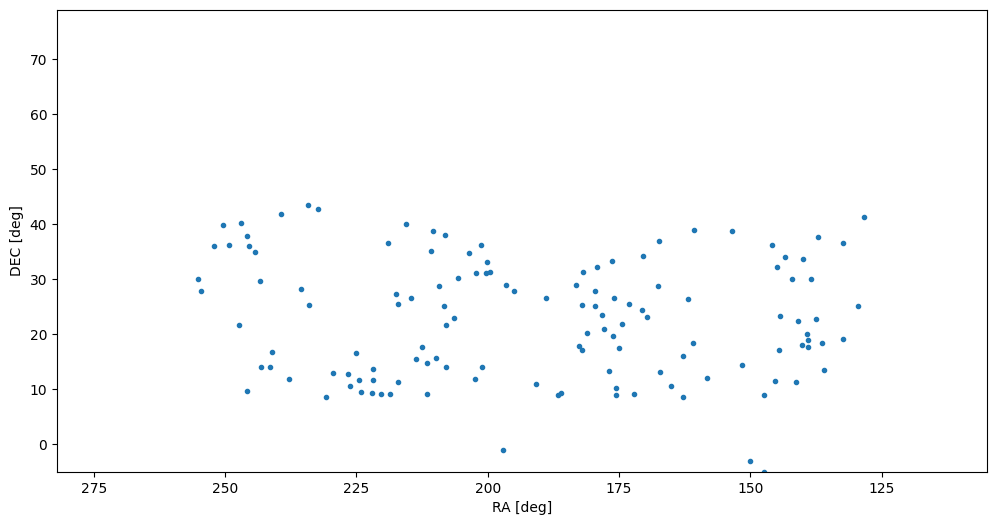

In [6]:
#plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plot
plt.figure(figsize=(12,6))
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],marker='.')
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")
ax = plt.gca()
ax.set_xlim([105, 282])
ax.set_ylim([-5, 79])
ax.set_xticks([275,250,225,200,175,150,125])
ax.invert_xaxis()
plt.show()

These are the groups within the general view of the VFS data.

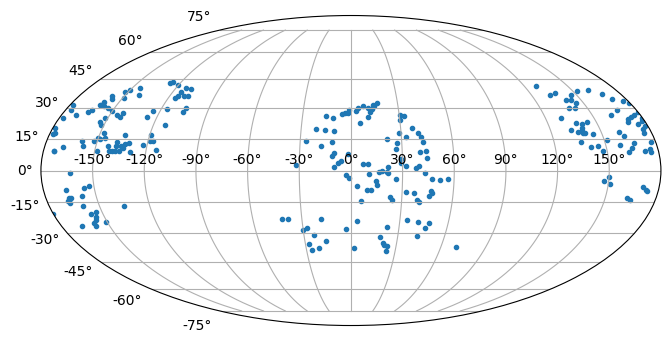

In [11]:
#plotting data as a mollweide image requires data to be in radians
ra = Angle(tbl['RAJ2000']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = Angle(tbl['DEJ2000']*u.degree)
#plot on mollweide projection
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian,marker='.')
ax.grid(True)

We can view the groups on a survey of the night sky using a mollweide projection.
***

### Rich Groups VFS
Here's where I sorted out the rich groups from the full catalog of VFS data as we would like to match with the rich groups which are groups that have more than 5 members. The survey data is stored in .fits files. We can read these in using the Table astropy package.

In [13]:
#import dependancies and directories
from astropy.table import Table
from astropy import units as u
from matplotlib import pyplot as plt
import os
import numpy as np
homedir = 'C:/Users/Oran1/OneDrive - University of Kansas/Research'
tabledir = 'C:/Users/Oran1/OneDrive - University of Kansas/Research/VFS .fits'
plotdir = 'C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots'

In [20]:
#list all .fits files in my directory
os.listdir(tabledir)

['kourkchi_groups_info.fits',
 'rasscals.fits',
 'vf_v2_a100.fits',
 'vf_v2_agc.fits',
 'vf_v2_co.fits',
 'vf_v2_CO_HI.fits',
 'vf_v2_environment.fits',
 'vf_v2_extinction.fits',
 'vf_v2_filament_distances.fits',
 'vf_v2_galfit_g.fits',
 'vf_v2_galfit_r.fits',
 'vf_v2_galfit_W1-fixBA.fits',
 'vf_v2_galfit_W1.fits',
 'vf_v2_galfit_W2.fits',
 'vf_v2_galfit_W3-fixBA.fits',
 'vf_v2_galfit_W3.fits',
 'vf_v2_galfit_W4.fits',
 'vf_v2_galfit_z.fits',
 'vf_v2_halpha.fits',
 'vf_v2_halpha_obs.fits',
 'vf_v2_hyperleda.fits',
 'vf_v2_kourkchi_galaxies.fits',
 'vf_v2_legacy_dr9.fits',
 'vf_v2_legacy_ephot.fits',
 'vf_v2_legacy_viewer.fits',
 'vf_v2_magphys_legacyExt_16-Feb-2024.fits',
 'vf_v2_magphys_legacyExt_17-Feb-2024.fits',
 'vf_v2_magphys_legacyExt_final.fits',
 'vf_v2_magphys_nozband_legacyExt_16-Feb-2024.fits',
 'vf_v2_magphys_nozband_legacyExt_17-Feb-2024.fits',
 'vf_v2_main.fits',
 'vf_v2_matchTempel_groupinfo.fits',
 'vf_v2_nedquery.fits',
 'vf_v2_nsa_v0.fits',
 'vf_v2_nsa_v1.fits',
 'vf

I originally used a python script "readtablesv2.py" by Rose Finn that was used previously with the survey to read in the .fits tables, but I have found that astropy's Table package works slightly better.

In [21]:
cd C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits\

C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits


In [18]:
# reading in tables
main = Table.read("vf_v2_main.fits")
env = Table.read("vf_v2_environment.fits")

In [19]:
main

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix
,,,,arcsec,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747


The VFS tables have a variety of headers that can be viewed at https://docs.google.com/document/d/1qPeHg--dMuKJeIR5FPwBZI8VD9QR--w3R5quJk_Tfug/edit?usp=sharing.

Plotting all VFS data on a graph<br>
We can observe the flow of galaxies within the survery by viewing each galaxies coordinates mapped, and their relative speed (marked by vr in the main table) as the color of the marks.

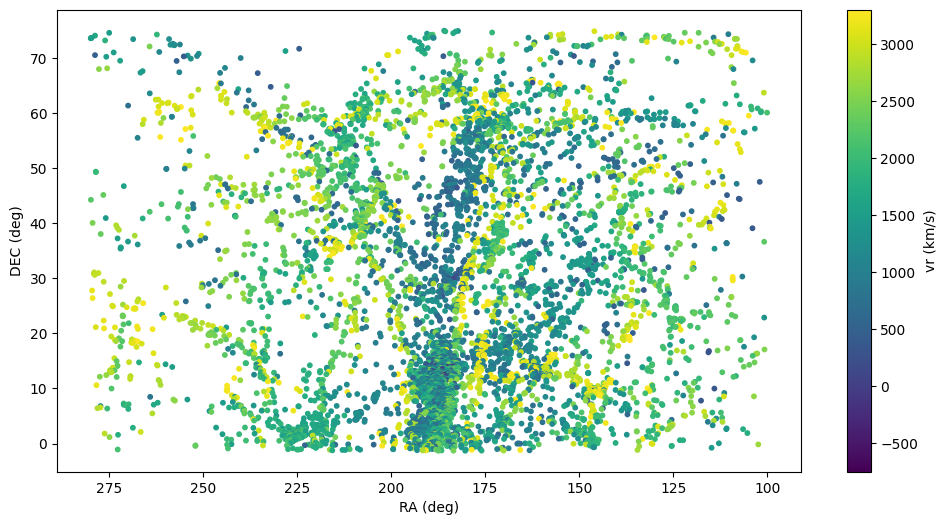

In [22]:
#plot all! RA/DEC
plt.figure(figsize=(12,6))
#plots column RA in main.fits against DEC
plt.scatter(main['RA'],main['DEC'],c=main['vr'],s=10) # plotting main.ra as x, main.dec as y, and main.vr as color
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()

We can mark out which of these are part of a group with more than 5 members by checking the value of the rich_group_memb flag in the environment table of VFS. We can assign `[v.env['rich_group_memb'] == True]` as an array, which will be a True of False value for each galaxy. By running `main['RA'][v.env['rich_group_memb'] == True]` as long as the array's are the same size, we can get the data from only the galaxies which have 5 or more members in their group.

In [23]:
env

VFID,DM,SGX,SGY,SGZ,nCI08,nCI08_err,distSGX_Virgo,distSGY_Virgo,distSGZ_Virgo,n5th_2D,n5th_2D_err,n5th,n5th_err,Vcosmic,Vmodel,Vmedian,poor_group_memb,rich_group_memb,pure_field,nearest_filament_dist_2D,nearest_filament_dist_3D,filament,filament_PA,orientation_wrt_filament,filament_member,mem_phase_space,cluster_member,mem_Mould00,sep_degree
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,float64,float64,bytes40,float64,float64,bool,bool,bool,bool,float64
VFID0000,31.941844830063214,13.145689815736862,11.738032079989287,4.111198355924238,0.09100991167247066,0.02686072613022795,15.409025350662194,1.842051278949052,4.526500946558278,0.7856420753367201,0.3513498172873834,0.07541017414247678,0.03372445511553499,1809.6754122333089,1809.6754122333089,0.0,False,True,False,3.379527299081431,5.217677443566046,Bootes,113.42767598067097,76.57232401932903,False,False,False,False,62.570119372065726
VFID0001,30.824492927707986,7.90894905971585,7.017661982903995,2.284969213716576,0.0461352792838557,0.013616397148532532,10.172284594641182,-2.87831881813624,2.7002718043506153,0.23578532750520065,0.1054464040797359,0.056695964637788275,0.025355206196003763,1081.7584723176835,1722.6764108994216,1081.7584723176835,False,True,False,5.171323556709356,5.232772280613474,Leo_Minor,106.69403584063132,25.545964159368694,False,False,False,False,62.58939048635605
VFID0002,33.08861233285418,24.57232008873139,18.236938715608805,2.303486373551084,0.09538853839762654,0.028153036947034134,26.835655623656724,8.34095791456857,2.7187889641851237,0.9613015495936771,0.4299071223534695,0.17530005643618327,0.07839656853017106,3068.6982545259793,3380.6160975434336,3068.6982545259793,False,False,True,14.782650818489234,14.915240996710157,Bootes,117.24052264173427,27.759477358265727,False,False,False,False,66.58444470534114
VFID0003,32.377721425989066,16.04972421363977,14.3805709158205,4.987924263296796,0.22478546606423896,0.06634333262223746,18.313059748565102,4.484590114780266,5.403226853930836,1.1359651708786418,0.5080190684313615,0.3621526842486207,0.16195960404278664,2211.9535611201745,2211.9535611201745,0.0,False,True,False,5.840428989011135,5.990562912055835,Bootes,113.42767598067097,52.57232401932903,False,False,False,False,62.45929044800913
VFID0004,32.229043216376944,15.062039166171804,13.42946756799603,4.409443857800289,0.5007172431173859,0.14778202163805867,17.325374701097136,3.5334867669557948,4.824746448434329,1.9908993941285014,0.890357276326895,0.5878042339602495,0.26287404491946165,2065.5721196274976,2065.5721196274976,0.0,False,True,False,5.008853600511673,5.504963104498067,Bootes,113.42767598067097,58.24232401932902,False,False,False,False,62.47768115452717
VFID0005,32.36852023075264,16.36887945443161,14.24733084177353,3.77071849313914,0.13802755894500718,0.04073754595640609,18.632214989356942,4.351350040733296,4.18602108377318,0.710316038718794,0.31766298961671924,0.14521501536328987,0.0649421291411985,2202.600664358308,2291.262875707811,2202.600664358308,False,False,True,6.45054229250542,6.615030952002659,Bootes,113.42767598067097,38.25232401932904,False,False,False,False,62.775312807551586
VFID0006,32.87852023075263,23.823428368645985,14.429624490058709,0.4977223192390418,0.15240610288342013,0.04498123901998244,26.086763903571317,4.533643689018474,0.9130249098730814,0.8477993886325675,0.3791474128530367,0.22690642225734137,0.10147563693973731,2785.709119178054,2668.9580301351834,2785.709119178054,False,False,True,13.230324533410682,13.253159491214863,LeoII_B,151.0938249425952,21.03617505740479,False,False,False,False,71.74274616620686
VFID0007,32.79468989279763,23.147324448597697,13.506784603390928,0.35156759342053373,0.19910443878305567,0.05876381707424648,25.41065998352303,3.610803802350693,0.7668701840545733,0.707759758449266,0.31651978632627803,0.2382651684812946,0.106555422678923,2680.215400343395,2680.215400343395,0.0,False,False,True,12.6093

Text(0, 0.5, 'DEC (deg)')

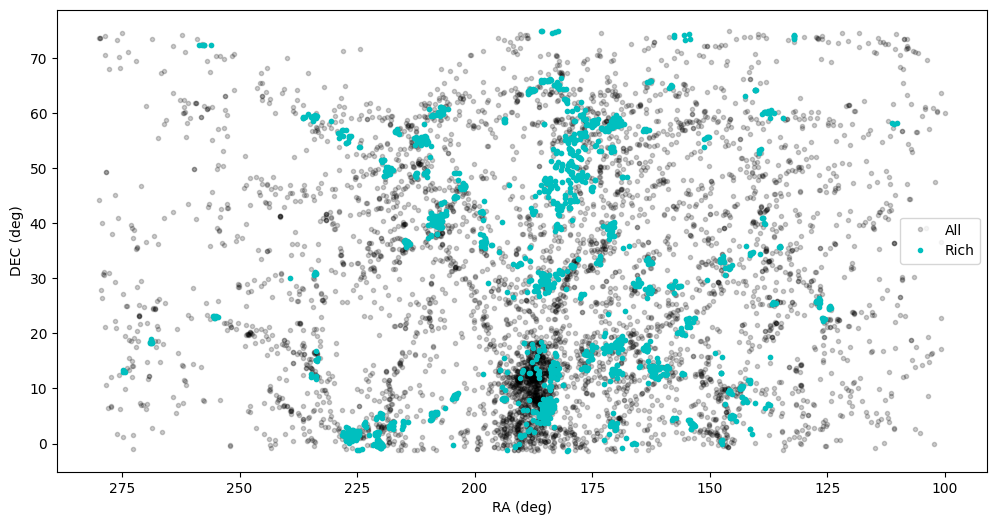

In [145]:
plt.figure(figsize=(12,6))
plt.plot(main['RA'],main['DEC'],'k.',alpha=.2,label='All')
# plot RICH sources
plt.plot(main['RA'][env['rich_group_memb'] == True],main['DEC'][env['rich_group_memb'] == True],'co',markersize=3,alpha=1,label='Rich' )
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')

We can plot only the "rich group" galaxies.

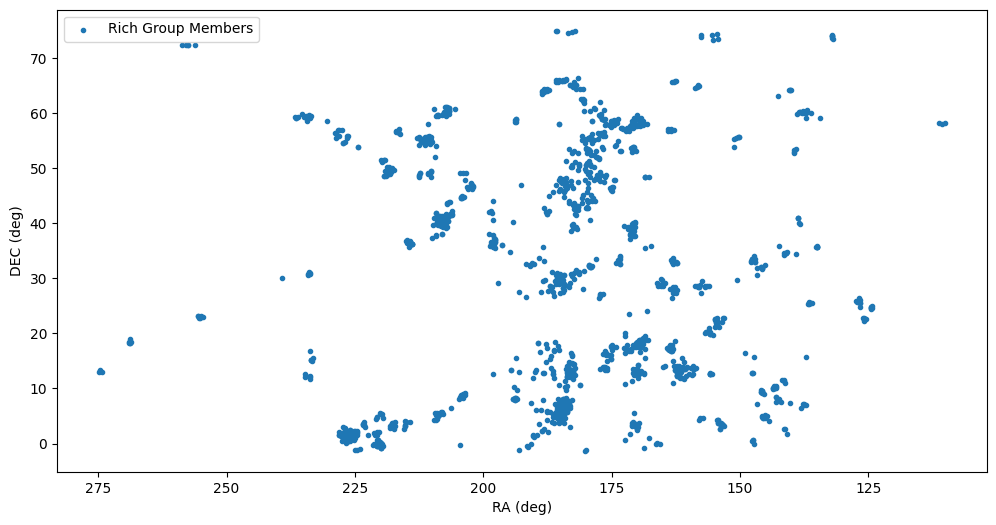

In [27]:
# make a flag for galaxies who are marked true in the column rich group members.
flag = (env['rich_group_memb']==True)
plt.figure(figsize=(12,6))
# plot RA vs DEC of the objects with the flag (use the flag to sort through the data)
plt.scatter(main['RA'][flag],main['DEC'][flag],marker='.',label='Rich Group Members')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
ax = plt.gca()
ax.invert_xaxis()

***

### MATCHING RASSVFS(rich)
We now need to determine if any VFS groups match the RASSCALS groups so that we can use the X-ray data from the RASSCALS survey.<br>
We can utilize the astropy SkyCoord matching package. <br>

In [13]:
#dependancies
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
import os
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

In [14]:
cd C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits\

C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits


In [15]:
# reading in tables
main = Table.read("vf_v2_main.fits")
env = Table.read("vf_v2_environment.fits")

In [16]:
#checking if .fits files were read in correctly
env

VFID,DM,SGX,SGY,SGZ,nCI08,nCI08_err,distSGX_Virgo,distSGY_Virgo,distSGZ_Virgo,n5th_2D,n5th_2D_err,n5th,n5th_err,Vcosmic,Vmodel,Vmedian,poor_group_memb,rich_group_memb,pure_field,nearest_filament_dist_2D,nearest_filament_dist_3D,filament,filament_PA,orientation_wrt_filament,filament_member,mem_phase_space,cluster_member,mem_Mould00,sep_degree
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,float64,float64,bytes40,float64,float64,bool,bool,bool,bool,float64
VFID0000,31.941844830063214,13.145689815736862,11.738032079989287,4.111198355924238,0.09100991167247066,0.02686072613022795,15.409025350662194,1.842051278949052,4.526500946558278,0.7856420753367201,0.3513498172873834,0.07541017414247678,0.03372445511553499,1809.6754122333089,1809.6754122333089,0.0,False,True,False,3.379527299081431,5.217677443566046,Bootes,113.42767598067097,76.57232401932903,False,False,False,False,62.570119372065726
VFID0001,30.824492927707986,7.90894905971585,7.017661982903995,2.284969213716576,0.0461352792838557,0.013616397148532532,10.172284594641182,-2.87831881813624,2.7002718043506153,0.23578532750520065,0.1054464040797359,0.056695964637788275,0.025355206196003763,1081.7584723176835,1722.6764108994216,1081.7584723176835,False,True,False,5.171323556709356,5.232772280613474,Leo_Minor,106.69403584063132,25.545964159368694,False,False,False,False,62.58939048635605
VFID0002,33.08861233285418,24.57232008873139,18.236938715608805,2.303486373551084,0.09538853839762654,0.028153036947034134,26.835655623656724,8.34095791456857,2.7187889641851237,0.9613015495936771,0.4299071223534695,0.17530005643618327,0.07839656853017106,3068.6982545259793,3380.6160975434336,3068.6982545259793,False,False,True,14.782650818489234,14.915240996710157,Bootes,117.24052264173427,27.759477358265727,False,False,False,False,66.58444470534114
VFID0003,32.377721425989066,16.04972421363977,14.3805709158205,4.987924263296796,0.22478546606423896,0.06634333262223746,18.313059748565102,4.484590114780266,5.403226853930836,1.1359651708786418,0.5080190684313615,0.3621526842486207,0.16195960404278664,2211.9535611201745,2211.9535611201745,0.0,False,True,False,5.840428989011135,5.990562912055835,Bootes,113.42767598067097,52.57232401932903,False,False,False,False,62.45929044800913
VFID0004,32.229043216376944,15.062039166171804,13.42946756799603,4.409443857800289,0.5007172431173859,0.14778202163805867,17.325374701097136,3.5334867669557948,4.824746448434329,1.9908993941285014,0.890357276326895,0.5878042339602495,0.26287404491946165,2065.5721196274976,2065.5721196274976,0.0,False,True,False,5.008853600511673,5.504963104498067,Bootes,113.42767598067097,58.24232401932902,False,False,False,False,62.47768115452717
VFID0005,32.36852023075264,16.36887945443161,14.24733084177353,3.77071849313914,0.13802755894500718,0.04073754595640609,18.632214989356942,4.351350040733296,4.18602108377318,0.710316038718794,0.31766298961671924,0.14521501536328987,0.0649421291411985,2202.600664358308,2291.262875707811,2202.600664358308,False,False,True,6.45054229250542,6.615030952002659,Bootes,113.42767598067097,38.25232401932904,False,False,False,False,62.775312807551586
VFID0006,32.87852023075263,23.823428368645985,14.429624490058709,0.4977223192390418,0.15240610288342013,0.04498123901998244,26.086763903571317,4.533643689018474,0.9130249098730814,0.8477993886325675,0.3791474128530367,0.22690642225734137,0.10147563693973731,2785.709119178054,2668.9580301351834,2785.709119178054,False,False,True,13.230324533410682,13.253159491214863,LeoII_B,151.0938249425952,21.03617505740479,False,False,False,False,71.74274616620686
VFID0007,32.79468989279763,23.147324448597697,13.506784603390928,0.35156759342053373,0.19910443878305567,0.05876381707424648,25.41065998352303,3.610803802350693,0.7668701840545733,0.707759758449266,0.31651978632627803,0.2382651684812946,0.106555422678923,2680.215400343395,2680.215400343395,0.0,False,False,True,12.6093

In [17]:
#reading in RASSCALS data
#outputted from site into .csv, opened in Excel and then converted to tab-delimited .txt for readable columns
tbl=ascii.read("C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots/RASSCALS-VFS MATCH/RASSCALS.txt")
tbl

RASSCALS,RAJ2000,DEJ2000,N,N17,cz,e_cz,logsigmap,logLX,e_logsigmap,e_logLX
str7,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64
SS2b003,2.2324999999999995,-37.47083333,5,35,8357,60,2.14,42.1,0.2,--
SRGb061,2.93625,28.359722222222217,10,57,7855,163,2.71,41.9,0.06,--
SS2b004,3.6966666666666663,-7.237777778,5,11,5290,65,2.19,41.7,0.14,--
SS2b005,3.8812499999999996,-24.12722222,5,24,7390,35,1.86,42.0,0.15,--
SRGb062,4.6049999999999995,30.070277777777772,13,49,6811,122,2.64,42.66,0.1,0.07
SRGb063,5.409999999999999,22.40555555555555,10,25,5665,87,2.46,42.56,0.11,0.09
SS2b009,6.073333333333332,-14.24361111,5,20,6919,153,2.53,41.9,0.23,--
SRGb067,7.200416666666666,2.905277777777777,8,7,4141,62,2.28,41.5,0.09,--
SRGb069,7.603333333333333,30.97583333333333,9,27,6232,40,2.08,41.8,0.08,--


Now that we have both tables of data from both surveys, we can plot both of them on the same map, and observe the overlapping of the coordinates. We can later try more precicely check which coordinates are within a degree of seperation. <br>
Accessible colors for plots can be made with: https://colorbrewer2.org/

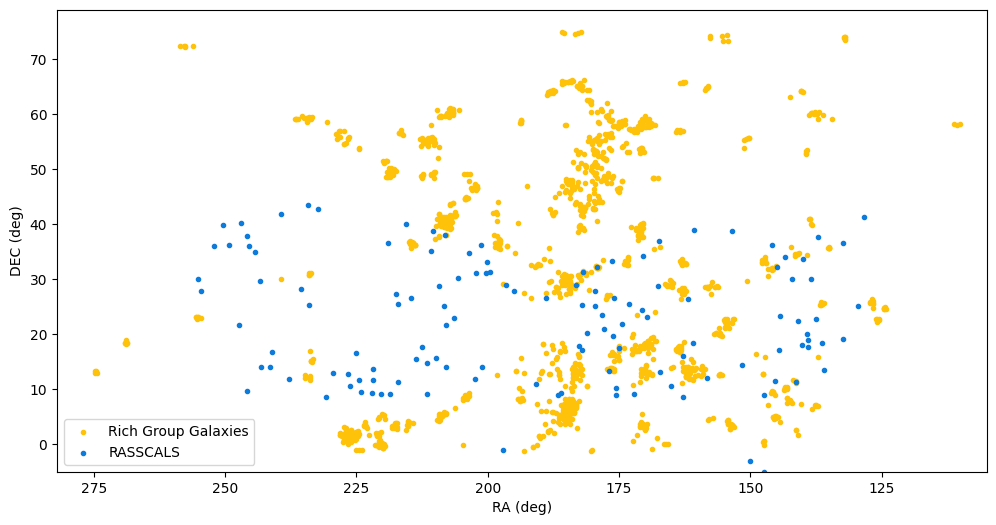

In [45]:
#plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plot
plt.figure(figsize=(12,6))
flag = (env['rich_group_memb']==True)
# plot RA vs DEC of the objects with the flag (use the flag to sort through the data)
plt.scatter(main['RA'][flag],main['DEC'][flag],marker='.',color='#FFC20A',label='Rich Group Galaxies')
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],marker='.',color='#0C7BDC',label='RASSCALS')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
ax = plt.gca()
ax.set_xlim([105, 282])
ax.set_ylim([-5, 79])
ax.set_xticks([275,250,225,200,175,150,125])
ax.invert_xaxis()

SkyCoords allows us to more precisely compare which of the galaxies match the RASSCALS groups. By setting the RA and DEC of the rich group members as richcoords (a SkyCoords object) and RASSCALS RA and DEC as another SkyCoords Object, we can use the method .match_to_catalog_3d to match the two data points within an ange of seperation. If either object is within 47.5 arcmin (which was calculated as the average group angular radius) it will be listed as a catalog_match.

In [34]:
#changing ra/dec for each group into skycoords to calculate distance
x,y=main['RA'][env['rich_group_memb']==True],main['DEC'][env['rich_group_memb']==True]
richcoords = SkyCoord(x*u.deg,y*u.deg)
m,n=tbl['RAJ2000'],tbl['DEJ2000']
rascoords = SkyCoord(m*u.deg, n*u.deg)

In [35]:
#comparing rascal coords to rich galaxy groups within a sepeartaion of 47.6 arcmin (average rich group radius found below)
max_sep = (47.6/60) * u.degree
idx, d2d, d3d = rascoords.match_to_catalog_3d(richcoords)
sep_constraint = d2d < max_sep
c_matches = rascoords[sep_constraint]
catalog_matches = richcoords[idx[sep_constraint]]

In [36]:
#displaying matches as pure ra/dec data
catalog_matches

<SkyCoord (ICRS): (ra, dec) in deg
    [(141.4272195, 11.4321394), (145.190985 , 32.4724657),
     (175.0670055, 17.4572623), (177.2684775, 13.6295798),
     (179.226015 , 32.1588328), (181.9582455, 31.5521339),
     (183.086748 , 29.2093726), (197.0512485, 29.0882443),
     (208.0278165, 38.0670294)]>

In [37]:
len(catalog_matches)

9

There are 9 rich-group galaxies within 47.6 arcmin of a RASSCALS group or vice-versa. 

We can mark these down below by plotting the ra/dec of these matches. We can aquire these by using the getter method of the catalog_matches via catalog_matches.(ra/dec).value. <br>
We mark these seperately from the RASSCALS and Rich Group Members.

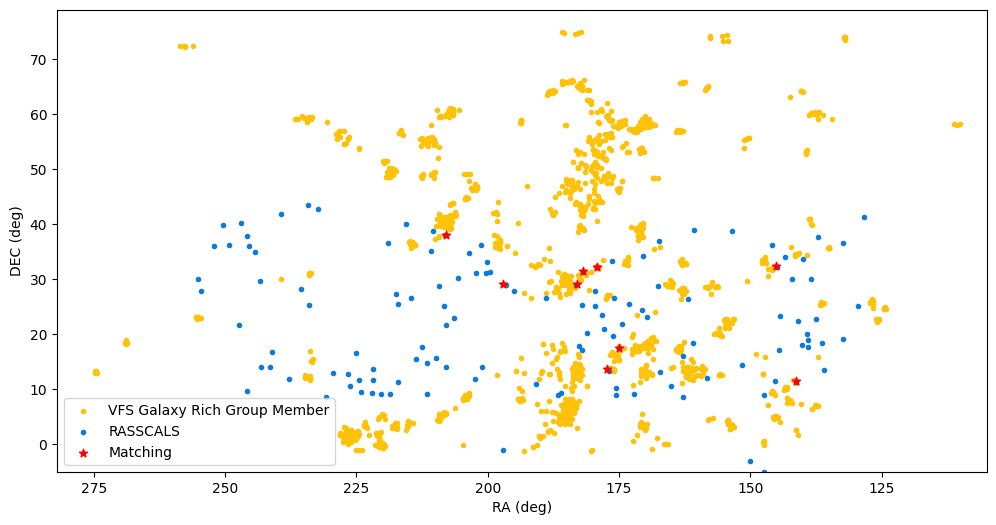

In [63]:
#plotting rows of acension and declination as x,y coords, and setting the axis to match VFS plot
plt.figure(figsize=(12,6))
flag = (env['rich_group_memb']==True)
# plot RA vs DEC of the objects with the flag (use the flag to sort through the data)
plt.scatter(main['RA'][flag],main['DEC'][flag],marker='.',label='VFS Galaxy Rich Group Member',color='#FFC20A')
plt.scatter(tbl['RAJ2000'],tbl['DEJ2000'],color='#0C7BDC',marker='.',label='RASSCALS')
plt.scatter(catalog_matches.ra.value,catalog_matches.dec.value,c='red',marker='*',label='Matching')
plt.legend()
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
ax = plt.gca()
ax.set_xlim([105, 282])
ax.set_ylim([-5, 79])
ax.set_xticks([275,250,225,200,175,150,125])
ax.invert_xaxis()
plt.savefig('matching.png')

### Finding angular stuff
Using triginometry and astropy packages allows us to find the angular sizes of VFS galaxy groups and give us a radius that RASSCALS groups should be within to "match" our groups. \
I made new tables to match certain columns, filtering out "unnecessary" columns, but it's possible and more safe to do it all at once. \
Using "flags" such as "rich_group = (env['rich_group_memb'] == True)" are more "clean" for visualization, but not necessary, and you can just plug the filters directly into where they are in the executing code. <br>
<br>
To get data about the VFS groups, we access tables kourkchi_groups_info and kourkchi_galaxies, which have relative data about the groups that the VFS galaxies belong to. <br>
We would like to find the average angular radius of the VFS groups so that we know what angle of seperation the groups from both surveys would need to be (on average) to be the same. To do this we need the angular radius of each group of course, which we can calculate using the small angle theorem. This requires us to have the distance and the size of the object we are trying to compute the angle of. The kourkchi_groups_info table has the virial radius of each group (the radius of gravitational bounds to the group) and that distance to that group in Mega-parsecs (Mpc), as rg_dyn and D.

In [64]:
# dependancies
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import ascii
from astropy.table import Table, join, Column, unique
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic
from astropy.coordinates import Angle, Latitude, Longitude
from astropy import units as u

In [65]:
cd C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits\

C:\Users\Oran1\OneDrive - University of Kansas\Research\VFS .fits


In [66]:
# importing each table and filtering out unneeded columns. Comment/uncomment keep_columns lines as needed. Should not affect calculations, just makes it more messy looking.
kourk = Table.read("kourkchi_groups_info.fits")
kourk.keep_columns(['PGC1', 'D','Rg_dyn','Glon','Glat','Mem'])
main = Table.read('vf_v2_main.fits')
main.keep_columns(['VFID', 'RA','DEC'])
env = Table.read("vf_v2_environment.fits")
env.keep_columns(['VFID', 'rich_group_memb'])
kourkgal = Table.read("vf_v2_kourkchi_galaxies.fits")
kourkgal.keep_columns(["VFID","PGC1","Kflag",'Mem'])

The coordinates for the group centers Glon and Glat, are stored as galactic coordinates, not RA/DEC, so we will use SkyCoords to convert those into RA/DEC coordinates, so that we can compare later compare groups to groups.

In [67]:
gc = SkyCoord(l=kourk['Glon']*u.degree, b=kourk['Glat']*u.degree, frame='galactic') # saving galactic coordinates of group centers as a SkyCoords

In [68]:
icrs = gc.icrs # converting group centers to RA/DEC coordinates

In [69]:
# adding group centers in ICRS to the table
kourk.add_column((icrs.ra), name ='GC_RA')
kourk.add_column((icrs.dec), name ='GC_DEC')

In [70]:
rich_group = (env["rich_group_memb"] == True) # filter for only galaxies with a TRUE rich group member flag
Kflag = (kourkgal["Kflag"] == True) # filter for galaxies that there is kourkchi data for

If a group doesn't have a distance or a computable radius of its gravitational influence (rg_dyn), they are set to -1000. We cannot use these, and so we will filter out those that have any values of -1000 in those two columns.

In [71]:
# filter for kourkchi_group_info, deterimining it to be calculatable as long as neither distance or radius is set to -1000
computable = (kourk['Rg_dyn'] != -1000) & (kourk['D'] != -1000)

We will make a table of only these groups that the angular radius can be computed.

In [72]:
compkourk = kourk[computable] # apply filter to kourk and save as new table, compkourk, with only groups that angular size can be calculated from

We can use the small angle approximation to find the angular size of the group. We need the distance $d$ and physical size (rg_dyn gives us radius of group) $r$ - both in the same units - and the SMAA will give us the angular radius.
\begin{equation}
    \theta_{\textrm{rad}} = \frac{r}{d}
\end{equation}
So if we use our values given and convert the angle into minutes of arc, our equation looks like this:
\begin{equation}
     \theta_{\textrm{arcmin}}=\textrm{rad2deg} * \textrm{deg2arcmin} * \frac{\textrm{rg\_dyn}}{D} = \frac{180}{\pi} * 60 * \frac{\textrm{rg\_dyn}}{D}
\end{equation}
We will add this to a new column, so that we can use it later.

In [73]:
# add a new column to compkourk, with caluclated values based upon radius and distance in Mpc. (radian to mas conversion)*((radius)/distance). Small angle approximation.
compkourk.add_column((((60*180)/np.pi)*(((compkourk['Rg_dyn'])/compkourk['D']))), name ='angradiiarcmin') 

In [74]:
# performs a join of the main table with only rich group galaxies, and kourkchi galaxies that have kourkchi data, matching their VFID's
joined = join(main,kourkgal,keys='VFID')

In [75]:
joined[rich_group & Kflag]

VFID,RA,DEC,PGC1,Mem,Kflag
bytes8,float64,float64,int64,int64,bool
VFID0000,185.86877249999998,74.9522485,39791,14,True
VFID0001,182.208,74.9042778,39791,14,True
VFID0003,185.5730835,74.8383889,39791,14,True
VFID0004,182.82775049999998,74.8082222,39791,14,True
VFID0011,154.4161905,74.3473859,30019,6,True
VFID0017,157.678335,74.2275172,30019,6,True
VFID0019,155.4540195,74.1769917,30019,6,True
VFID0020,132.0193335,74.0987778,24723,6,True
VFID0022,132.0992085,74.0382222,24723,6,True


After joining, we have the VFS galaxies in groups with at least 5 members, and the PGC1 values of each group that they are a member of.

In [76]:
# makes a final table by adding the galaxies corresponding data from kourkchi_info.fits, matching the PCG1 number.
final = join(joined[rich_group & Kflag],compkourk,keys='PGC1')

In [80]:
final.sort('VFID')
final

VFID,RA,DEC,PGC1,Mem_1,Kflag,Mem_2,Glon,Glat,D,Rg_dyn,GC_RA,GC_DEC,angradiiarcmin
,,,,,,,,,,,deg,deg,
bytes8,float64,float64,int64,int64,bool,int64,float64,float64,float64,float64,float64,float64,float64
VFID0000,185.86877249999998,74.9522485,39791,14,True,14,125.5799,41.6377,23.55,0.332,185.02403197708543,75.32901345918474,48.4642007601104
VFID0001,182.208,74.9042778,39791,14,True,14,125.5799,41.6377,23.55,0.332,185.02403197708543,75.32901345918474,48.4642007601104
VFID0003,185.5730835,74.8383889,39791,14,True,14,125.5799,41.6377,23.55,0.332,185.02403197708543,75.32901345918474,48.4642007601104
VFID0004,182.82775049999998,74.8082222,39791,14,True,14,125.5799,41.6377,23.55,0.332,185.02403197708543,75.32901345918474,48.4642007601104
VFID0011,154.4161905,74.3473859,30019,6,True,6,136.0873,39.407,40.46,0.632,154.465214941124,73.55218810201785,53.69886206465848
VFID0017,157.678335,74.2275172,30019,6,True,6,136.0873,39.407,40.46,0.632,154.465214941124,73.55218810201785,53.69886206465848
VFID0019,155.4540195,74.1769917,30019,6,True,6,136.0873,39.407,40.46,0.632,154.465214941124,73.55218810201785,53.69886206465848
VFID0020,132.0193335,74.0987778,24723,6,True,6,139.8088,33.9268,27.85,0.13,132.06767667904896,73.97955484372018,16.04693286183275


Now we've found all the groups we need, we just need to clean it up to only be single groups. We can do this by finding each unique PGC1 group in the list of rich group galaxies.

In [84]:
richgroups = unique(final,keys='PGC1')
richgroups.keep_columns(['D','angradiiarcmin','Rg_dyn','PGC1','GC_RA','GC_DEC','Mem_1'])

In [83]:
richgroups

PGC1,Mem_1,D,Rg_dyn,GC_RA,GC_DEC,angradiiarcmin
,,,,deg,deg,
int64,int64,float64,float64,float64,float64,float64
20884,6,31.62,0.145,110.89152451985345,58.05137586337251,15.764493414415439
23266,7,35.32,0.147,124.5143014929415,24.703024556373745,14.307722970141167
23498,7,41.3,0.186,125.73192211111737,22.607076524533923,15.482346231622248
23701,10,28.21,0.229,126.79911634091,25.93634786998548,27.906558330724963
24723,6,27.85,0.13,132.06767667904896,73.97955484372018,16.04693286183275
25915,10,23.05,0.263,137.5224183434896,60.08451028419961,39.2246160831427
26034,6,49.63,0.668,138.67825321715466,40.5584373300437,46.27070003796776
26246,6,36.64,0.192,139.40802347871843,53.01300841323535,18.014393558698373


We now have all the data we need to match the groups from both surveys.

Debug Section: Displaying Kourkchi PGC1 groups that angular size cannot be computed for

In [85]:
uncomp = (kourk['Rg_dyn'] == -1000) | (kourk['D'] == -1000)

In [86]:
uncomputable = kourk[uncomp]

Uncomputable groups

In [87]:
uncomputable

PGC1,Mem,Glon,Glat,D,Rg_dyn,GC_RA,GC_DEC
,,,,,,deg,deg
int64,int64,float64,float64,float64,float64,float64,float64
27845,1,136.7127,36.7942,-1000.0,-1000.0,145.94497582864437,74.85943923724287
35608,1,129.7859,41.4339,28.97,-1000.0,173.13431991122206,74.6275443694711
22815,1,139.9986,31.1184,-1000.0,-1000.0,121.91290244052547,74.58460927847646
22064,1,140.1833,30.1542,-1000.0,-1000.0,118.23713597598872,74.5763630851225
61742,1,105.5357,28.1747,20.89,-1000.0,274.9429676172973,74.56835776059832
42595,1,123.8175,42.6908,-1000.0,-1000.0,190.43521172554506,74.42077445587114
2761545,1,140.6043,28.054,-1000.0,-1000.0,110.33355523403766,74.3237779101567
26284,1,138.386,35.6633,-1000.0,-1000.0,139.63436417673805,74.31910802530757


Computable groups

In [88]:
kourk[computable]

PGC1,Mem,Glon,Glat,D,Rg_dyn,GC_RA,GC_DEC
,,,,,,deg,deg
int64,int64,float64,float64,float64,float64,float64,float64
39791,14,125.5799,41.6377,23.55,0.332,185.02403197708543,75.32901345918474
30019,6,136.0873,39.407,40.46,0.632,154.465214941124,73.55218810201785
42139,4,124.2367,42.9066,20.94,0.212,189.3506089625685,74.18607635577942
24723,6,139.8088,33.9268,27.85,0.13,132.06767667904896,73.97955484372018
23604,4,140.4975,32.5002,29.66,0.198,126.52561930721532,73.86483274332923
26295,2,139.0724,35.872,29.51,0.243,139.34173334862632,73.72982701022482
41947,2,124.4696,43.4061,27.93,0.031,188.8825331080606,73.67462564154101
43426,3,123.0418,44.2398,28.58,0.345,192.5919471542709,72.88822411571434


Graphing histogram of group sizes in Mpc <br>
We can use this to view the distribution of group sizes.

Text(0.5, 1.0, '')

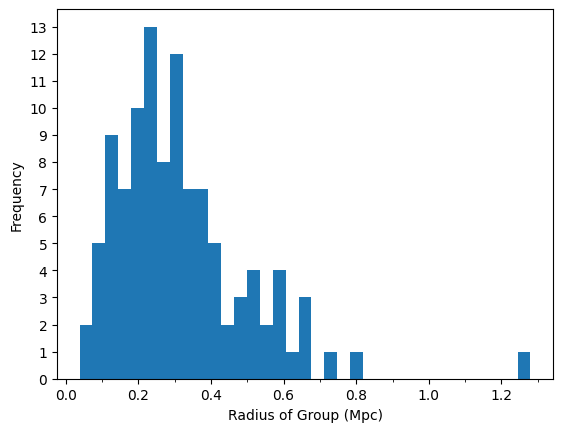

In [91]:
plt.hist(richgroups['Rg_dyn'],bins=35)
# Adding labels and title
plt.xlabel('Radius of Group (Mpc)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.4, step=0.1),minor=True)
plt.yticks(np.arange(0,14, step=1))
plt.title('')
#plt.savefig('histradii.jpg')

 We can see that there are much more galaxies with a virial radius of around 1.5-2.5 Mpc. <br>
(Graph excludes radii in table set at -1000 for individual, non-grouped, galaxies.)

Graphing histogram in angular size <br>
Now this lets us see the angular size distribution, and calculate the average of all of the angular radii.

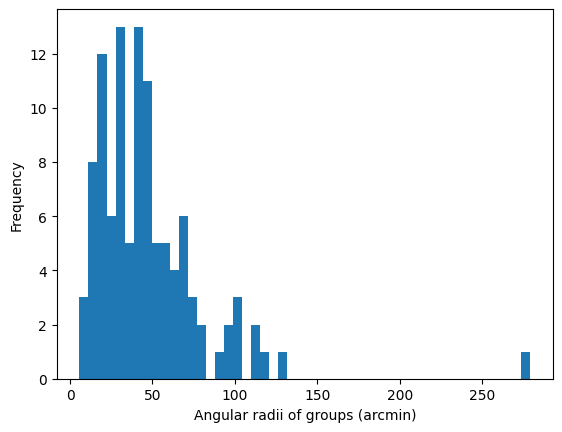

Average angular radius of ALL rich groups is 47.6 arcmin


In [90]:
plt.hist(richgroups['angradiiarcmin'], bins=50)
# Adding labels and title
plt.xlabel('Angular radii of groups (arcmin)')
plt.ylabel('Frequency')
plt.title('')
plt.show()
#plt.savefig('histangradii.jpg')
print("Average angular radius of ALL rich groups is",round(np.mean(richgroups['angradiiarcmin']),1),"arcmin")

This shows that the average radius of all rich groups is around 47.6 arcmin, or 0.8 degrees, so the average distance we should consider to be "matched" should be 47.6 arcmin.

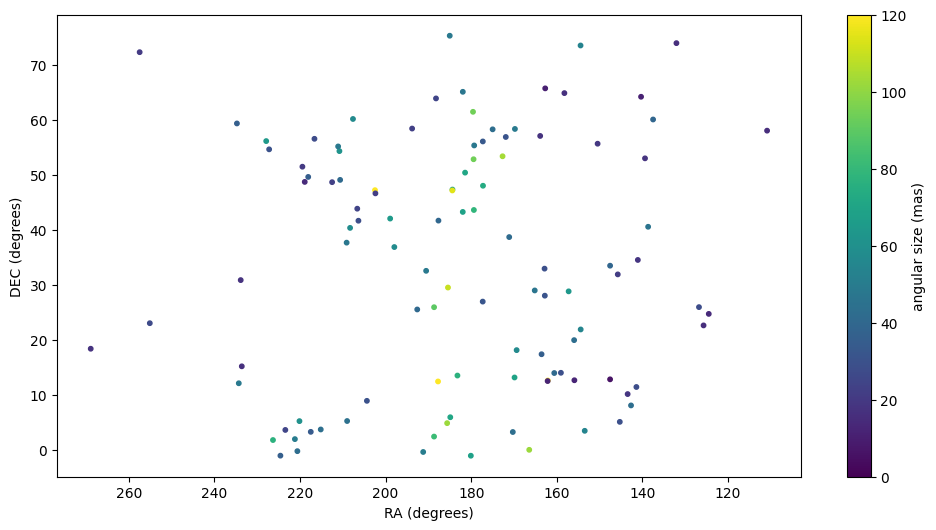

In [104]:
#plot all! RA/DEC
plt.figure(figsize=(12,6))
#plots column RA in main.fits against DEC
plt.scatter(richgroups['GC_RA'],richgroups['GC_DEC'],c=richgroups['angradiiarcmin'],s=10)
#plt.scatter(richgroups['G_RA'],richgroups['G_DEC'],c=richgroups['angradiusMOA'],s=richgroups['angradiusMOA'])
cb = plt.colorbar()
plt.clim(0,120)
cb.set_label('angular size (mas)')
#plt.scatter(final['RA']*60,final['DEC']*60, c='r',marker=',',s=10)
#plt.scatter(ras['RAJ2000'],ras['DEJ2000'],color='green',marker='.',label='RASSCALS')
#plt.scatter(catalog_matches.ra.deg*60,catalog_matches.dec.deg*60,color='red',s=10,marker=',',label='MATCHES')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
#plt.xlabel('RA (minutes)')
#plt.ylabel('DEC (minutes)')
ax = plt.gca()
ax.invert_xaxis()
#plt.savefig('image.jpg')

### Matching RASSCALS 
We can now use the average angular radius that we found above and be more precise in our comparison of the two sets of galaxy groups.

In [94]:
#reading in RASSCALS data
#outputted from site into .csv, opened in Excel and then converted to tab-delimited .txt for readable columns
ras=ascii.read("C:/Users/Oran1/OneDrive - University of Kansas/Research/Plots/RASSCALS-VFS MATCH/RASSCALS.txt")

Instead of the RA/DEC of the rich galaxies, we will use the RA/DEC of the center of the groups (GC_[RA/DEC])

In [96]:
#changing ra/dec for each group into skycoords to calculate distance
x,y=richgroups['GC_RA'],richgroups['GC_DEC']
richcoords = SkyCoord(x,y)
m,n=ras['RAJ2000'],ras['DEJ2000']
rascoords = SkyCoord(m*u.deg, n*u.deg)

In [97]:
#comparing rascal coords to rich galaxy groups within a sepeartaion of 47.6 arcmin (average rich group radius found below)
max_sep = (47.6/60) * u.degree # value obtained as average from "matching" section above
idx, d2d, d3d = rascoords.match_to_catalog_3d(richcoords)
sep_constraint = d2d < max_sep
c_matches = rascoords[sep_constraint]
catalog_matches = richcoords[idx[sep_constraint]]

In [98]:
catalog_matches

<SkyCoord (ICRS): (ra, dec) in deg
    [(141.42042498, 11.3995343), (188.68107722, 25.9188585)]>

Now there are only **2** groups within our seperation constraints.

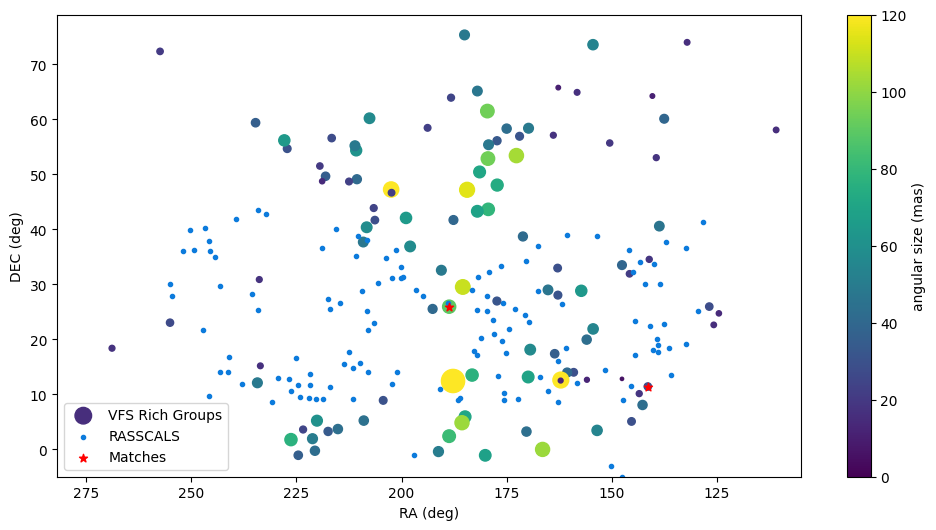

In [144]:
#plot all! RA/DEC
plt.figure(figsize=(12,6))
#plots column RA in main.fits against DEC
plt.scatter(richgroups['GC_RA'],richgroups['GC_DEC'],c=richgroups['angradiiarcmin'],s=richgroups['angradiiarcmin'],label='VFS Rich Groups')
cb = plt.colorbar()
plt.clim(0,120)
plt.scatter(ras['RAJ2000'],ras['DEJ2000'],c='#0C7BDC',marker='.',label='RASSCALS')
plt.scatter(catalog_matches.ra.deg,catalog_matches.dec.deg,c='red',marker='*',label='Matches')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.legend()
cb.set_label('angular size (mas)')
ax = plt.gca()
ax.set_xlim([105, 282])
ax.set_ylim([-5, 79])
ax.set_xticks([275,250,225,200,175,150,125])
ax.invert_xaxis()
#plt.savefig('matches.jpg')